# Example of VisualApp for recommendations

Visual analysis is an important part of the models evaluation process. Let's see how to use interactive Jupyter widgets for visualization with RecTools

`visuals` extension for `rectools` is required to run this notebook. You can install it with `pip install rectools[visuals]`

**Table of Contents**

* [Prepare data](#data)
* [Simple visualization example](#simple_app)
* [VisualApp features](#features)
    * [Any html code from df values](#formatters)
    * [Random users](#random)
    * [Multiple models comparison](#models)
    * [Saving and loading app](#save_load)
    * [Item-to-item case](#i2i)
* [Final app example](#final)

In [2]:
import pandas as pd

from rectools import Columns
from rectools.visuals import VisualApp, ItemToItemVisualApp

## Prepare data <a class="anchor" id="data"></a>
Imagine we have movie recommendations task. We trained a model and calculated recommendations for a set of users. Now we want to visualize results. Researcher usually wants to see both user's `interactions` history with the items, his `recommended items` from the model and also some additional `item data`.

In [3]:
interactions = pd.DataFrame({
    "user_id": [10, 10, 20],
    "item_id": [1, 2, 4],
})
interactions

,user_id,item_id
0,10,1
1,10,2
2,20,4


In [4]:
reco = pd.DataFrame({
    "user_id": [10, 10, 20, 20],
    "item_id": [4, 0, 1, 2],
    "rank": [1, 2, 1, 2],
    "model": ["Random model"] * 4
})
reco

,user_id,item_id,rank,model
0,10,4,1,Random model
1,10,0,2,Random model
2,20,1,1,Random model
3,20,2,2,Random model


In [5]:
item_data = pd.DataFrame({
    "item_id": range(5),
    "name": ["Green book", "Meir from Easttown", "True detective", "Oppenheimer", "John Wick"],
    "jenre": ["drama", "detective", "detective", "drama", "action"],
    "img_url": [
        'https://avatars.mds.yandex.net/get-kinopoisk-image/1900788/8e4206c9-fb99-4f43-9170-4586a5bc5b9b/3840x',
        'https://avatars.mds.yandex.net/get-kinopoisk-image/4774061/9c4e7a31-2b5a-4c8c-abc3-bfd67b8778cb/576x',
        'https://avatars.mds.yandex.net/get-kinopoisk-image/1946459/f5d887aa-dee4-4158-9713-61d41b04f94d/3840x',
        'https://avatars.mds.yandex.net/get-kinopoisk-image/6201401/9d064dee-0b29-4660-881a-1e7a3f81b3da/3840x',
        'https://avatars.mds.yandex.net/get-kinopoisk-image/1946459/bed1d2f9-cf3a-46a2-a6cd-cde4dc41ea43/3840x'
        ]
})
item_data

,item_id,name,jenre,img_url
0,0,Green book,drama,https://avatars.mds.yandex.net/get-kinopoisk-i...
1,1,Meir from Easttown,detective,https://avatars.mds.yandex.net/get-kinopoisk-i...
2,2,True detective,detective,https://avatars.mds.yandex.net/get-kinopoisk-i...
3,3,Oppenheimer,drama,https://avatars.mds.yandex.net/get-kinopoisk-i...
4,4,John Wick,action,https://avatars.mds.yandex.net/get-kinopoisk-i...


## Simple visualization example <a class="anchor" id="simple_app"></a>
Now we wan't to visualize recommedations for users in a conveninent and interactive way using RecTools `VisualApp`.  

In [ ]:
app = VisualApp.construct(
    reco=reco,
    interactions=interactions,
    item_data=item_data,
    selected_users={"detective user": 10, "action user": 20},  # users that we want to visualise
    formatters={"img_url": lambda x: f"<img src={x} width=100>"}  # process "img_url" links to html code
)

If you run this notebook, you will get **interactive** widgets with active buttons to select users.   
For offline presentation we keep **static** screenshots of the actual app.  

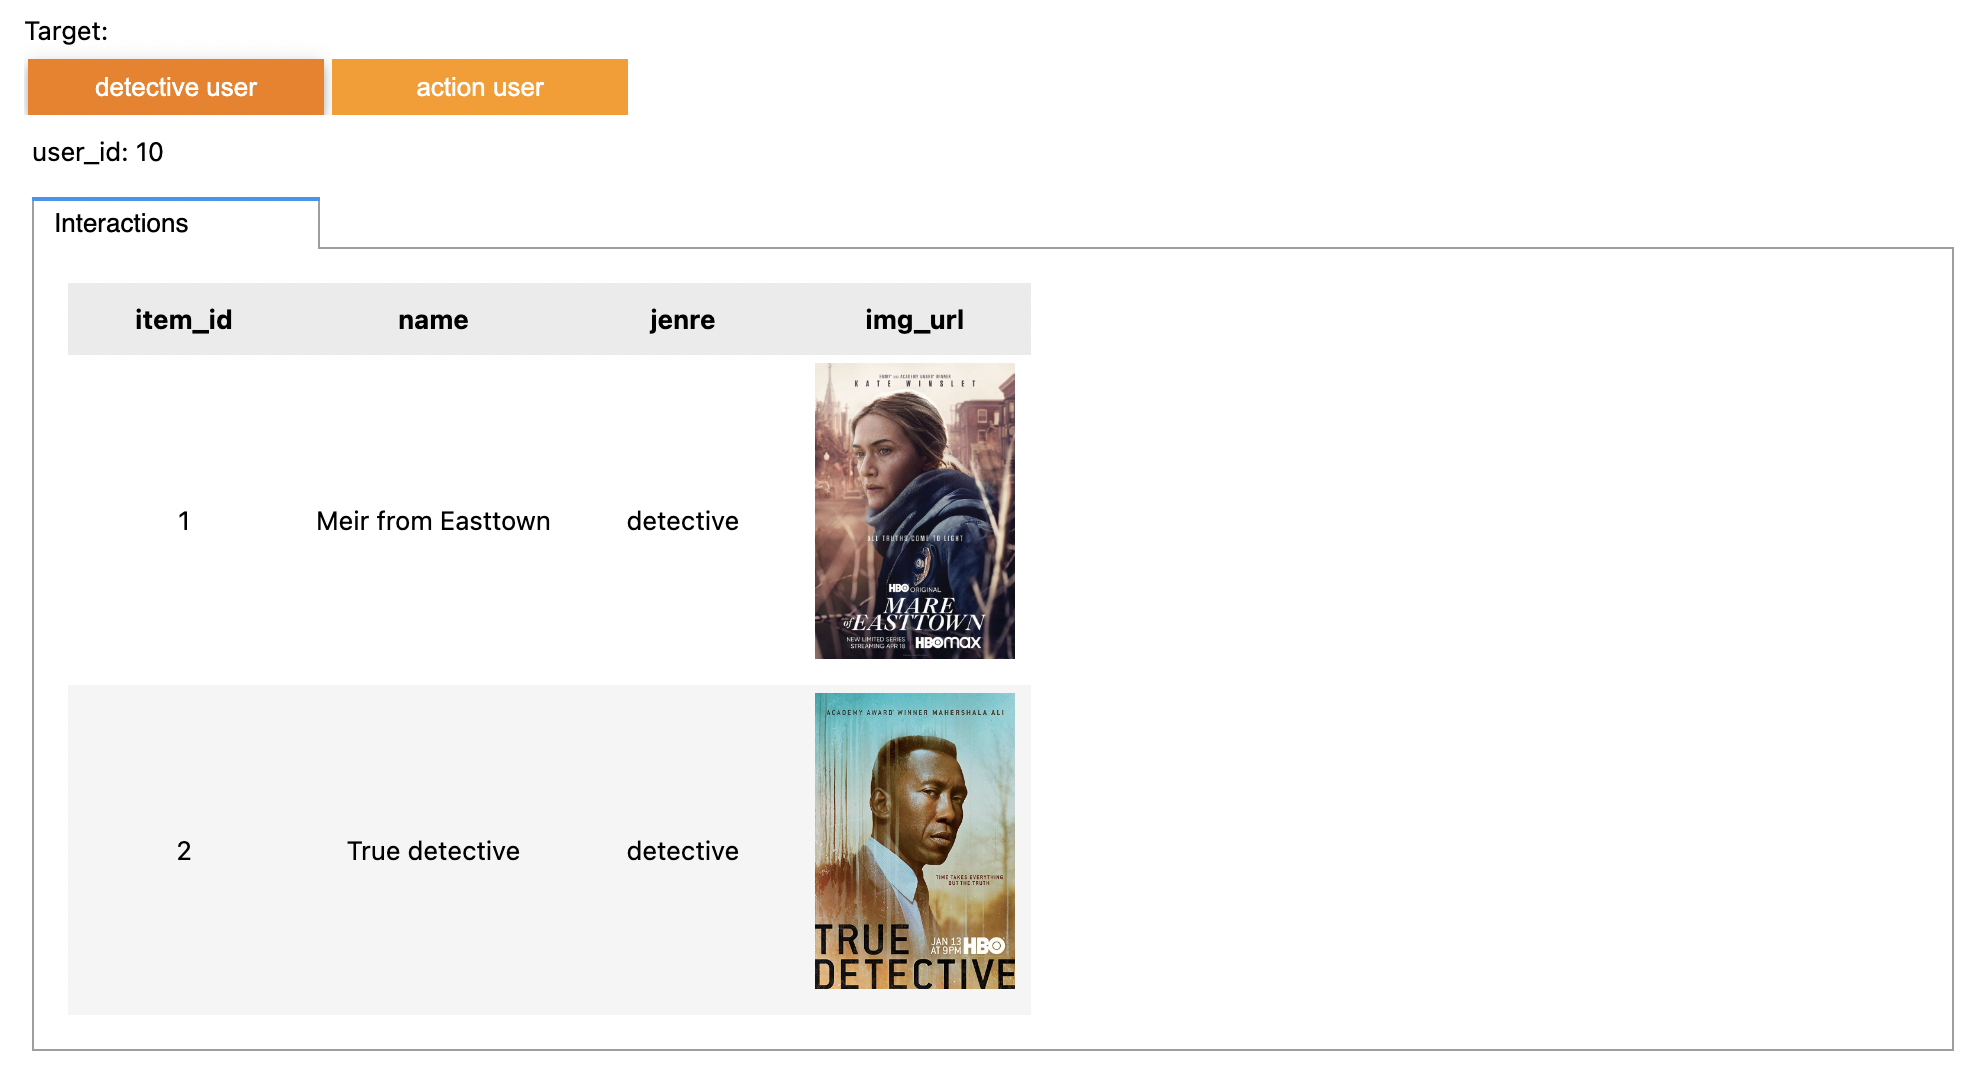

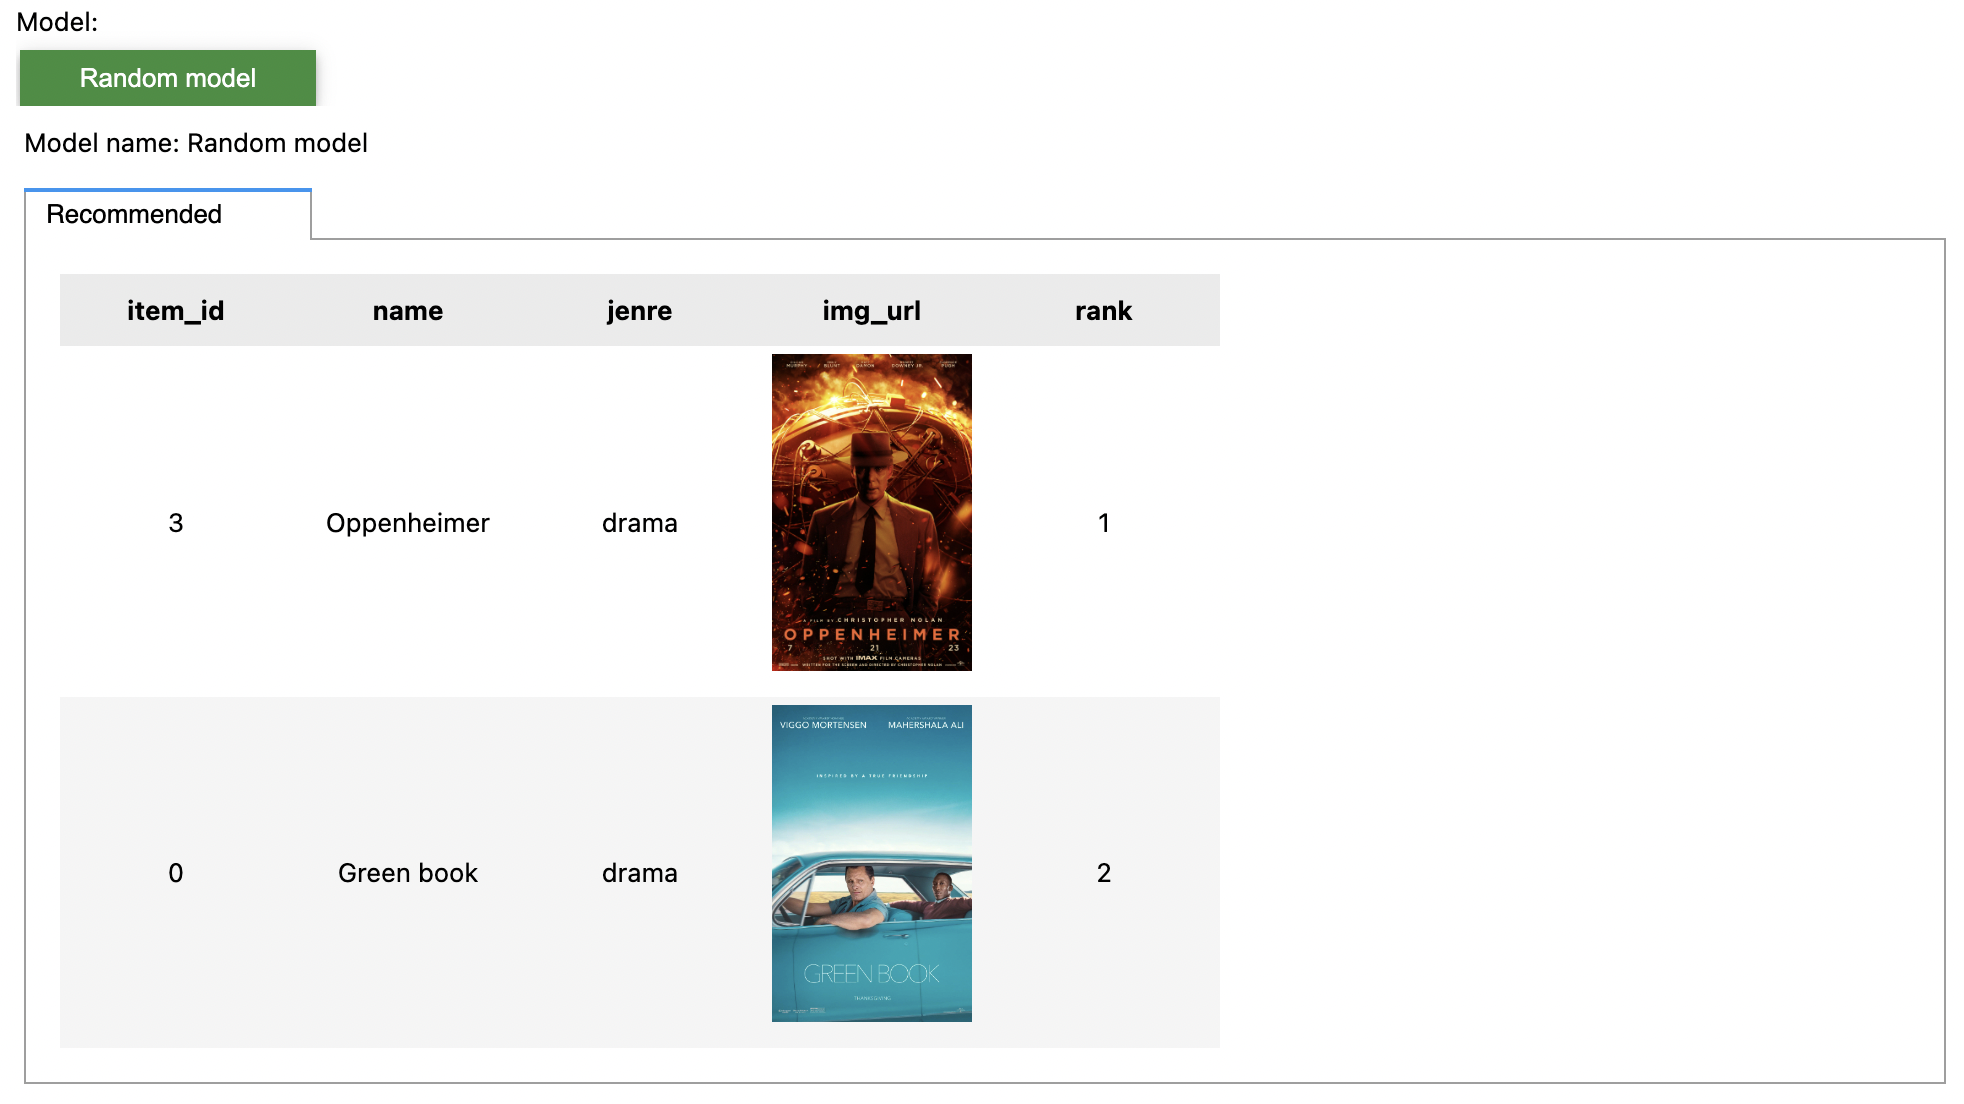

## Details on `VisualApp` features <a class="anchor" id="features"></a>

#### 1. How to process pd.DataFrame values into any desired html code (e.g. display actual images from links)  <a class="anchor" id="formatters"></a>
For this we need to prepare the `formatters` dict. Dataframe column names are keys and functions to generate html code are values. You can process any columns present in the app

In [23]:
def image_html(url: str) -> str:
    return '<img src="' + url + '" style=max-height:150px;"/>'

formatters={"img_url":image_html}  # "img_url" here is a name of the column in `item_data`

#### 2. How to add random users for visualization <a class="anchor" id="random"></a>
Just pass `n_random_users` with the desired amount. Users will be selected from those that are present in recommendations

In [24]:
n_random_users=2

#### 3. How to pass multiple models for visualization <a class="anchor" id="models"></a>
For this you can just add recommendations from another model to the same `reco` dataframe and write different model name in "model" column.  
Or alternatively you can create a `TablesDict` with model names as keys and model recommendations dataframes as values. Just like in the example below:

In [30]:
reco = {
    "model_1": pd.DataFrame({Columns.User: [10, 20], Columns.Item: [3, 4], Columns.Score: [0.99, 0.9]}),
    "model_2": pd.DataFrame({Columns.User: [10, 20], Columns.Item: [2, 0], Columns.Rank: [1, 1]})
}

#### 4. How to save `VisualApp` and easily access the same widgets later <a class="anchor" id="save_load"></a>
Jupyter widgets disappear when notebook is closed. To recreate the same widgets use `save` and `load` methods of `VisualApp`.

In [33]:
app = VisualApp.construct(
    reco=reco,
    interactions=interactions,
    item_data=item_data,
    n_random_users=n_random_users,
    formatters=formatters,
    auto_display=False  # prevent widgets from displaying
)
app.save("sample_app")

# Next time just run:  
# app = VisualApp.load("sample_app", formatters=formatters)

#### 5. Hot to visualize item-to-item recommendations   <a class="anchor" id="i2i"></a>
For this case use `ItemToItemVisualApp`. Interface is almost the same, but there is no need for interactions now. Remember to specify target items in `Columns.TargetItem` column in recommendations

In [ ]:
reco = {
    "model_1": pd.DataFrame({Columns.TargetItem: [1, 2], Columns.Item: [3, 4], Columns.Score: [0.99, 0.9]}),
    "model_2": pd.DataFrame({Columns.TargetItem: [1, 2], Columns.Item: [2, 1], Columns.Rank: [1, 1]})
}

## Final app example  <a class="anchor" id="final"></a>
- item-to-item recommendations
- multiple models comparison
- random targets
- custom html code for column with images

In [ ]:
app = ItemToItemVisualApp.construct(
    reco=reco, 
    item_data=item_data,
    n_random_items=2,
    formatters=formatters,
)

If you run this notebook, you will get **interactive** widgets with active buttons to select items and models.   
For offline presentation we keep **static** screenshots of the actual app.  

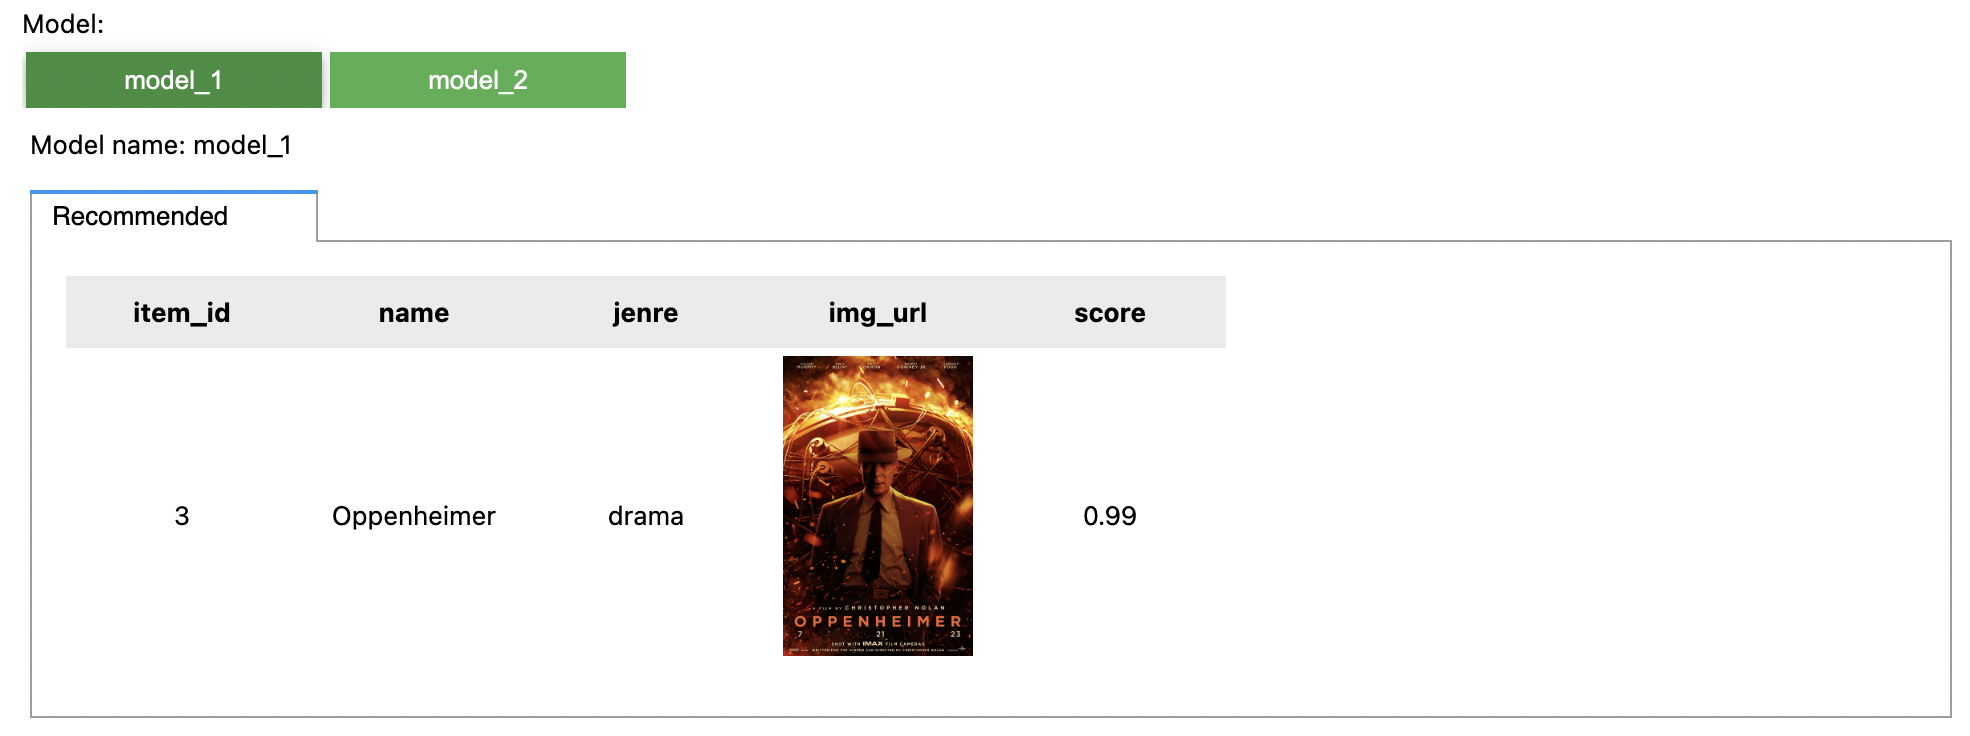

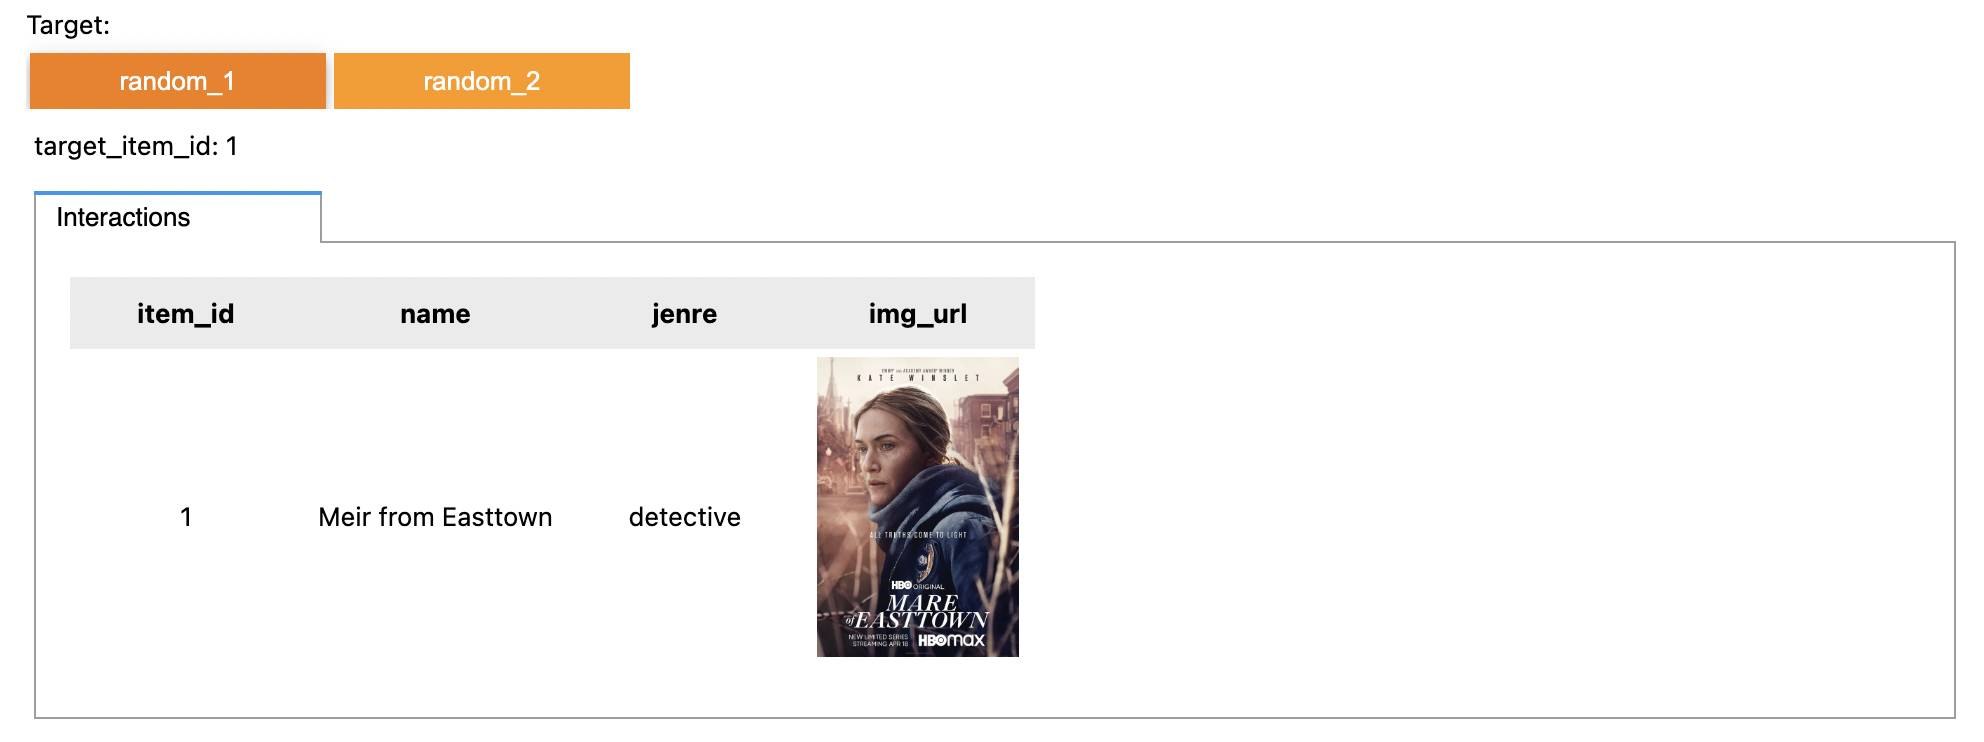